# Análisis de los datos de los usuarios una compañía telefónica y su tasa de abandono

---



Teniendo un listado con los datos de los usuarios de una compañía telefónica y si la información de baja o no de la compañía, vamos a realizar un análisis de los datos de la lista utilizando la librería **Pandas** de **Python** para realizar una buena exploración de los datos.

**Pandas** es una librería de **Python** que tiene implementadas potentes funcionalidades para el análisis de datos. Es frecuente que los datos se encuentren en tablas en archivos con formato .csv o .xlsx. Con Pandas se pueden leer, guardar y procesar esos datos de forma muy similar a un lenguaje de base de datos con sus tablas. Pandas tambien es frecuente que se combine con librerías de visualización de datos como **Matplotlib** y **Seaborn**.

Las estructuras de datos principales de Pandas son las ***Series*** y los ***DataFrame***. Las Series son estructuras de tipo array de una dimension, mientras que los DataFrame son tablas en la que cada columna contiene datos del mismo tipo, las columnas se denominan variables y las filas observaciones.








### Importar librerías de Python necesarias 

En primer lugar, importamos librerias **numpy** y **pandas** de **Python**.

In [0]:
import numpy as np
import pandas as pd

### Lectura del fichero de datos

En segundo lugar, leeremos el fichero en el que se encuentran los datos. Como es un fichero .csv utilizaremos el método ***read_csv()*** de **pandas** la información del fichero .csv ahora se copiará a una variable o instancia ***DataFrame*** de **pandas**.

Escribiendo el nombre de la variable o instancia se muestra el **DataFrame**.

In [2]:
dataframe = pd.read_csv('telecom_churn.csv')
dataframe

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Funciones principales de Pandas para analizar un DataFrame

El atributo ***shape*** retorna las filas y columnas que contiene el ***DataFrame***

In [3]:
dataframe.shape

(3333, 20)

El atributo ***columns*** retorna el nombre de las columnas del ***DataFrame***.

In [4]:
dataframe.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

El método ***info()*** retorna la información de valores nulos y los tipos de datos de las columnas del ***DataFrame***.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


El método ***describe()*** retorna información estadística de las columnas del ***DataFrame***, como puede ser el número total de filas, valor mínimo, valor máximo, media, cuartiles, etc.

In [6]:
dataframe['Churn'] = dataframe['Churn'].astype('int64')
dataframe.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


También podemos parametrizar el método ***describe()*** para visualizar valores no numéricos.

In [7]:
dataframe.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


El método ***value_counts()*** retorna el número de observaciones por cada valor o etiqueta que hay en una columna del ***DataFrame***. También se puede parametrizar para que en lugar del total retorne el porcentaje.

In [8]:
dataframe['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [9]:
dataframe['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

El método ***sort_values()*** ordena el ***DataFrame*** por **columnas** de forma ascendente o descendente. Si el DataFrame tiene muchas **filas** se puede utilizar el método ***head()*** para indicar el top-N del ***DataFrame***

In [10]:
dataframe.sort_values(by='Total day charge', ascending=False).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
975,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
1679,OK,82,510,No,No,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,1
2028,SD,93,510,No,No,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,1
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1


In [11]:
dataframe.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
1165,VT,50,415,Yes,Yes,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,0
3207,DC,93,408,No,Yes,22,306.2,123,52.05,189.7,83,16.12,240.3,107,10.81,11.7,2,3.16,0,0
2478,TN,123,415,No,Yes,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1,0
1355,TX,50,408,No,Yes,31,302.7,93,51.46,240.5,119,20.44,193.9,103,8.73,13.6,14,3.67,3,0
1830,CT,50,408,No,No,0,301.7,82,51.29,167.1,118,14.20,72.2,89,3.25,10.5,6,2.84,1,0


### Selección de filas y columnas del DataFrame

Para seleccionar **una** **columna** del ***DataFrame***, puedes escribir ***dataframe['Columna']***. Para seleccionar **más de una** **columna** puedes escribir ***dataframe[['Columna1', 'Columna2', ..., 'ColumnaN']]***.

In [12]:
dataframe['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [13]:
dataframe[['State','Churn']]

,State,Churn
0,KS,0
1,OH,0
2,NJ,0
3,OH,0
4,OK,0
...,...,...
3328,AZ,0
3329,WV,0
3330,RI,0
3331,CT,0


Se pueden filtrar las **filas** el ***DataFrame*** por condiciones, por ejemplo los usuarios que han abandonado la compañía telefónica.

In [14]:
dataframe[dataframe['Churn'] == 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


Una vez realizado el filtro, se puede seleccionar una columna de ese DataFrame filtrado y aplicarle alguna función estadística.

In [15]:
dataframe[dataframe['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

El filtro puede incluir más de una condición.

In [16]:
dataframe[(dataframe['Churn'] == 0) & (dataframe['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Para filtrar un ***DataFrame*** por un rango de filas y/o columnas utilizamos las funciones ***loc()*** e ***iloc()***, la diferencia es que con *loc()* indicamos el nombre de la columna y con *iloc()* su posición.

In [17]:
dataframe.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [18]:
dataframe.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


### Aplicar funciones a celdas, filas y columnas del DataFrame

Con el método ***apply()***, se aplica en este caso el valor máximo a todo el ***DataFrame*** en este caso aplicaremos la función de ***Numpy*** max()

In [19]:
dataframe.apply(np.max) 

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Se pueden reemplazar los valores de las celdas del ***DataFrame*** utilizando el método **map()** o el método **replace()**. En este caso reemplazaremos *'Yes'* y *'No'* por los valores booleanos *True* y *False*.

In [20]:
dic = {'No' : False, 'Yes' : True}
dataframe['International plan'] = dataframe['International plan'].map(dic)
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [21]:
dataframe = dataframe.replace({'Voice mail plan': dic})
dataframe.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Agrupamiento de variables del DataFrame

Para agrupar variables en general combinaremos variables y funciones estadísticas. Utilizaremos el método ***groupby()*** del ***DataFrame***.

In [22]:
columnas = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
dataframe.groupby(['Churn'])[columnas].describe(percentiles=[])

Total day minutes                         ... Total night minutes               
                  count        mean        std  ...                 min     50%    max
Churn                                           ...                                   
0                2850.0  175.175754  50.181655  ...                23.2  200.25  395.0
1                 483.0  206.914079  68.997792  ...                47.4  204.80  354.9

[2 rows x 18 columns]

### Tablas resumen de variables del DataFrame

Es muy útil a la hora de analizar datos resumir los mismos en tablas, en general para analizar la variable de salida de nuestro conjunto de datos, pero puede utilizarse para las variables que se desee. Utilizamos el método ***crosstab()*** de **Pandas**. Se pueden mostrar los valores totales, los porcentajes o incluir la suma de todos ellos en el borde de la tabla.

In [23]:
pd.crosstab(dataframe['Churn'], dataframe['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [24]:
pd.crosstab(dataframe['Churn'], dataframe['International plan'], normalize=True)

International plan,False,True
Churn,,
0,0.79928,0.055806
1,0.10381,0.041104


In [25]:
pd.crosstab(dataframe['Churn'], dataframe['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


### Visualización de datos

Una vez realizado el análisis de los datos, es buena práctica generar gráficos de los mismos para ayudar a la exploración. Para visualizar los datos utilizaremos las librerías **Matplotlib** y **Seaborn** de **Python**.

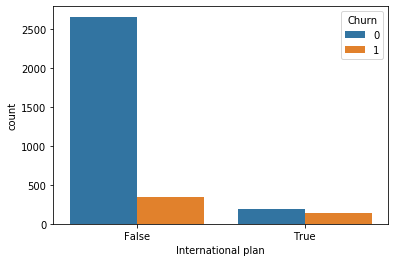

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='International plan', hue='Churn', data=dataframe);